# Polarization reconstruction with neutrinos

### Nov 3, 2020

## Code

In [1]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
import ROOT
import math
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import pyrex
import seaborn as sns
%matplotlib inline
sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes")
import deDisperse_util as util
from pyrex.internal_functions import normalize
my_path_plots = os.path.abspath("./plots/")

Welcome to JupyROOT 6.18/04


In [2]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")


## Gather data

In [70]:
appended_data = []
import os
for filename in os.listdir("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes"):#Loop over desired directory
        if (filename.startswith("pol_quant_noiseless_")): #extension, .root in this case
            name = os.path.join("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes", str(filename))
            data = pd.read_pickle(name)
            appended_data.append(data)
recoNu = pd.concat(appended_data)     
recoNu["theta_pol"] = np.degrees(np.arccos(abs(recoNu.pol_z)))
recoNu["theta_pol"] = recoNu["theta_pol"]
recoNu["deltaTheta"] = -90-recoNu.AngRatio+(90+recoNu.theta_pol)
recoNu = recoNu.loc[recoNu.rmsV>100]
recoNu = recoNu.loc[recoNu.rmsV<1400]
recoNu = recoNu.loc[recoNu.rmsH>100]
recoNu = recoNu.loc[recoNu.rmsH<1400]
# recoNu = recoNu.loc[recoNu.theta_reco<np.deg2rad(90)]
# recoNu = recoNu.loc[recoNu["AngStokes"]>1]



In [71]:
appended_data = []
import os
for filename in os.listdir("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes"):#Loop over desired directory
        if (filename.startswith("pol_quant_1")): #extension, .root in this case
            name = os.path.join("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes", str(filename))
            data = pd.read_pickle(name)
            appended_data.append(data)
recoNu_noise = pd.concat(appended_data)     
recoNu_noise["theta_pol"] = np.degrees(np.arccos(abs(recoNu_noise.pol_z)))
recoNu_noise["deltaTheta"] = -90-recoNu_noise.AngRatio+(90+recoNu_noise.theta_pol)
recoNu_noise = recoNu_noise.loc[recoNu_noise.rmsV>50]
recoNu_noise = recoNu_noise.loc[recoNu_noise.rmsV<1400]
recoNu_noise = recoNu_noise.loc[recoNu_noise.rmsH>50]
recoNu_noise = recoNu_noise.loc[recoNu_noise.rmsH<1400]
# recoNu_noise = recoNu_noise.loc[recoNu_noise["AngStokes"]>1]


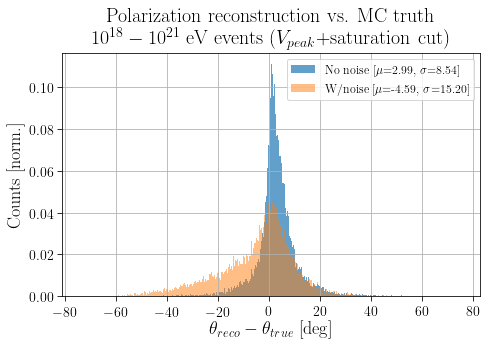

In [72]:
plt.figure(figsize=(7,5))
# plt.hist(recoNu.AngStokes-np.degrees(np.arccos(abs(recoNu.pol_z))), bins=100, density=False, alpha=1);
delta_std = recoNu.deltaTheta.std()
delta_mean = recoNu.deltaTheta.mean()
plt.hist(recoNu.deltaTheta, bins=500, density=True, alpha=0.7,label = "No noise [$\mu$=%0.2f, $\sigma$=%0.2f]"%(delta_mean, delta_std));

delta_std = recoNu_noise.deltaTheta.std()
delta_mean = recoNu_noise.deltaTheta.mean()
plt.hist(recoNu_noise.deltaTheta, bins=500, density=True, alpha=0.5, color="C1",label = "W/noise [$\mu$=%0.2f, $\sigma$=%0.2f]"%(delta_mean, delta_std));

plt.xlabel("$\\theta_{reco}-\\theta_{true}$ [deg]")
# plt.xlabel("$\\theta$")
plt.ylabel('Counts [norm.]')
# plt.title("Polarization reconstruction vs. MC truth \n $10^{18}-10^{21}$ eV events (no cuts)")
plt.title("Polarization reconstruction vs. MC truth \n $10^{18}-10^{21}$ eV events ($V_{peak}$+saturation cut)")

# plt.yscale("log")
# mplcyberpunk.add_glow_effects()
# plt.yscale('log')
plt.grid()
plt.legend()
plt.tight_layout()
# plt.savefig(my_path_plots+'/Dumpster/recoVsTrue_AraSim_noCuts.pdf')
# plt.savefig(my_path_plots+'/Dumpster/recoVsTrue_AraSim_Cuts.png', dpi=150)



(0, 90)

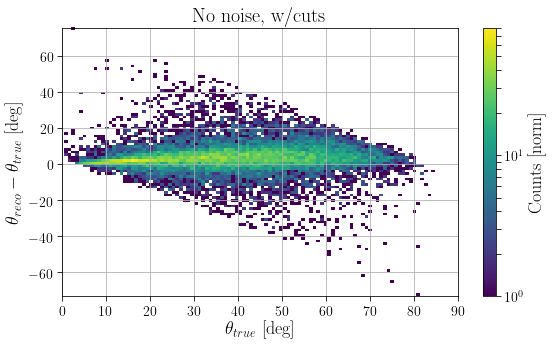

In [73]:
plt.figure(figsize=(8,5))
plt.hist2d(90-recoNu.theta_pol,recoNu.deltaTheta, bins=100, normed=False,norm=mpl.colors.LogNorm());
# plt.hist2d(90-recoNu_noise.AngStokes,recoNu_noise.AngStokes-recoNu_noise.theta_pol, bins=100, normed=True,norm=mpl.colors.LogNorm());
# plt.title("No noise, no cuts")
plt.title("No noise, w/cuts")
# plt.hist2d(angle_Stokes,angle_Stokes-angle_true)
plt.grid()
plt.colorbar(label="Counts [norm]")
plt.xlabel("$\\theta_{true}$ [deg]")
plt.ylabel("$\\theta_{reco}-\\theta_{true}$ [deg]")
# plt.title("$10^{21}$ eV neutrinos")
plt.tight_layout()
plt.xlim(0,90)
# plt.savefig(my_path_plots+'/Dumpster/deltaMCvsTrue_AraSim_noiseless_noCuts.pdf')
# plt.savefig(my_path_plots+'/Dumpster/deltaMCvsTrue_AraSim_noiseless_Cuts.pdf')
# plt.savefig(my_path_plots+'/Dumpster/deltaMCvsReco_AraSim_noiseless_noCuts.png', dpi=150)

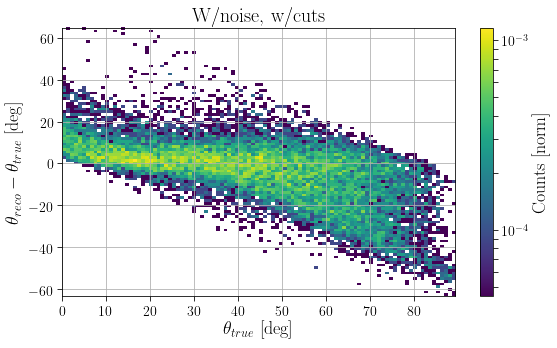

In [74]:
plt.figure(figsize=(8,5))
plt.hist2d(90-recoNu_noise.theta_pol,recoNu_noise.deltaTheta, bins=100, normed=True,norm=mpl.colors.LogNorm());
plt.title("W/noise, no cuts")
plt.title("W/noise, w/cuts")


# plt.hist2d(angle_Stokes,angle_Stokes-angle_true)
plt.colorbar(label="Counts [norm]")
plt.xlabel("$\\theta_{true}$ [deg]")
plt.ylabel("$\\theta_{reco}-\\theta_{true}$ [deg]")
# plt.title("$10^{21}$ eV neutrinos")
plt.grid()

plt.tight_layout()
# plt.ylim(-10,10)
# plt.savefig(my_path_plots+'/Dumpster/deltaMCvsTrue_AraSim_noise_noCuts.pdf')
# plt.savefig(my_path_plots+'/Dumpster/deltaMCvsTrue_AraSim_noise_Cuts.pdf')

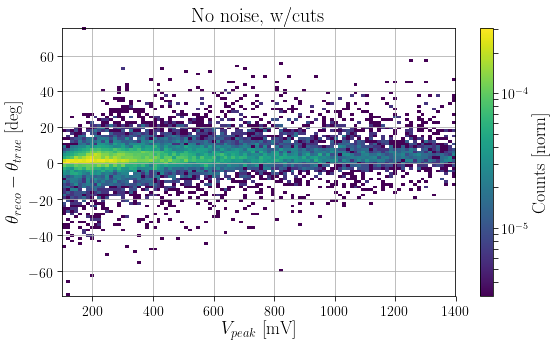

In [75]:
plt.figure(figsize=(8,5))
plt.hist2d(recoNu.rmsV,recoNu.deltaTheta, bins=100, normed=True,norm=mpl.colors.LogNorm());
# plt.hist2d(90-recoNu_noise.AngStokes,recoNu_noise.AngStokes-recoNu_noise.theta_pol, bins=100, normed=True,norm=mpl.colors.LogNorm());
# plt.title("No noise, no cuts")
plt.title("No noise, w/cuts")

# plt.hist2d(angle_Stokes,angle_Stokes-angle_true)
plt.colorbar(label="Counts [norm]")
# plt.xlabel("$\\theta_{true}$ [deg]")
plt.xlabel("$V_{peak}$ [mV]")
plt.ylabel("$\\theta_{reco}-\\theta_{true}$ [deg]")
# plt.title("$10^{21}$ eV neutrinos")
plt.grid()

plt.tight_layout()
# plt.ylim(-10,10)
# plt.savefig(my_path_plots+'/Dumpster/deltaMCvsVpeak_AraSim_noiseless_noCuts.pdf')
# plt.savefig(my_path_plots+'/Dumpster/deltaMCvsVpeak_AraSim_noiseless_Cuts.pdf')

(0, 30)

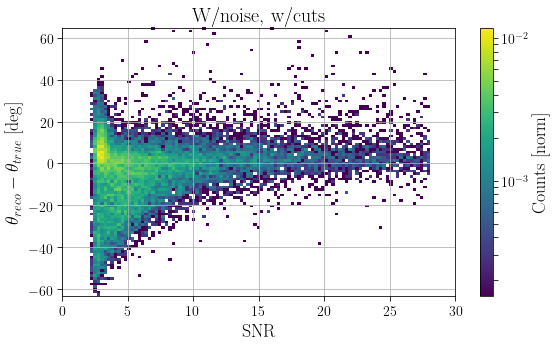

In [76]:
plt.figure(figsize=(8,5))
plt.hist2d(recoNu_noise.rmsV/50,recoNu_noise.deltaTheta, bins=100, normed=True,norm=mpl.colors.LogNorm());
plt.title("W/noise, w/cuts")

# plt.hist2d(angle_Stokes,angle_Stokes-angle_true)
plt.colorbar(label="Counts [norm]")
plt.xlabel("SNR")
plt.ylabel("$\\theta_{reco}-\\theta_{true}$ [deg]")
# plt.title("$10^{21}$ eV neutrinos")
plt.tight_layout()
plt.grid()

plt.xlim(0,30)
# plt.savefig(my_path_plots+'/Dumpster/deltaMCvsRMS_AraSim_noise_noCuts.pdf')
# plt.savefig(my_path_plots+'/Dumpster/deltaMCvsRMS_AraSim_noise_Cuts.pdf')

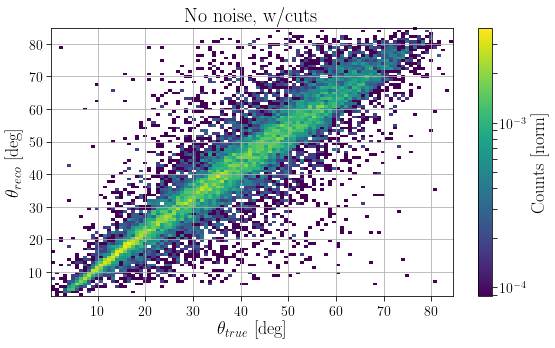

In [77]:
plt.figure(figsize=(8,5))
plt.title("No noise, w/cuts")
plt.hist2d(90-recoNu.theta_pol,90-recoNu.AngRatio, bins=100, normed=True, norm=mpl.colors.LogNorm());
# plt.hist2d(angle_Stokes,angle_Stokes-angle_true)
plt.colorbar(label="Counts [norm]")
plt.xlabel("$\\theta_{true}$ [deg]")
plt.ylabel("$\\theta_{reco}$ [deg]")
plt.tight_layout()
plt.grid()

# plt.savefig(my_path_plots+'/Dumpster/recovsTrue2D_noCuts.pdf')
# plt.savefig(my_path_plots+'/Dumpster/recovsTrue2D_Cuts.pdf')

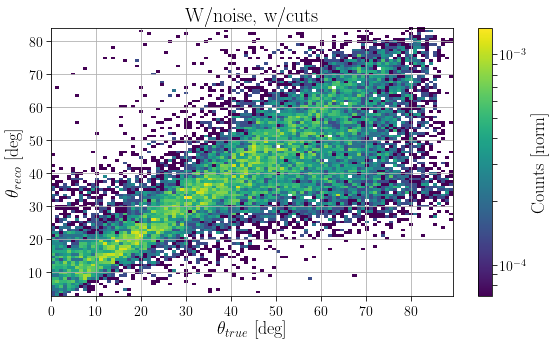

In [78]:
plt.figure(figsize=(8,5))
plt.title("W/noise, w/cuts")
plt.hist2d(90-recoNu_noise.theta_pol,90-recoNu_noise.AngRatio, bins=100, normed=True, norm=mpl.colors.LogNorm());
# plt.hist2d(angle_Stokes,angle_Stokes-angle_true)
plt.colorbar(label="Counts [norm]")
plt.xlabel("$\\theta_{true}$ [deg]")
plt.ylabel("$\\theta_{reco}$ [deg]")
plt.grid()

plt.tight_layout()
# plt.savefig(my_path_plots+'/Dumpster/recovsTrue2D_noise_Cuts.pdf')

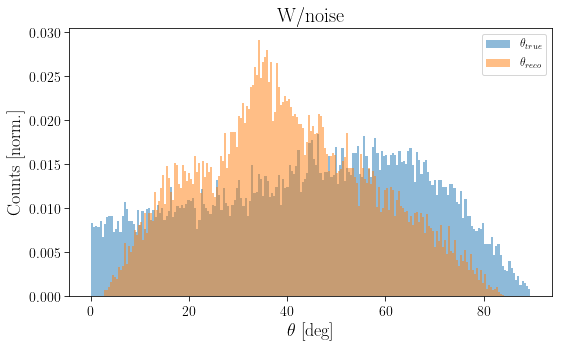

In [79]:
plt.figure(figsize=(8,5))
plt.title("W/noise")
plt.ylabel('Counts [norm.]')
plt.hist(90-recoNu_noise.theta_pol, bins=200, alpha=0.5, density=True,  label="$\\theta_{true}$");
plt.hist(90-recoNu_noise.AngRatio, bins=200, alpha=0.5, density=True, label="$\\theta_{reco}$");
plt.xlabel("$\\theta$ [deg]")
plt.legend()
plt.tight_layout()
# plt.savefig(my_path_plots+'/Dumpster/theta_dist_noise.pdf')

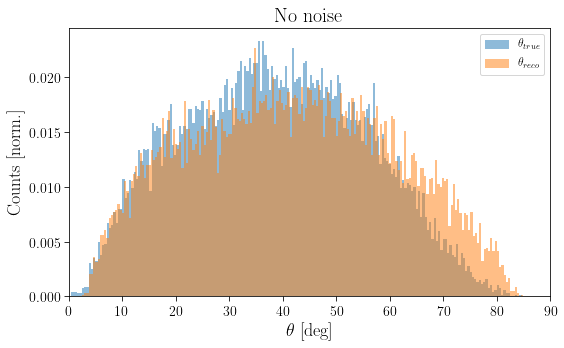

In [80]:
plt.figure(figsize=(8,5))
plt.title("No noise")
plt.ylabel('Counts [norm.]')
plt.hist(90-recoNu.theta_pol, bins=200, density=True, alpha=0.5,  label="$\\theta_{true}$");
plt.hist(90-recoNu.AngRatio, bins=200, density=True, alpha=0.5, label="$\\theta_{reco}$");
plt.xlabel("$\\theta$ [deg]")
plt.legend()
plt.xlim(0,90)
plt.tight_layout()
# plt.savefig(my_path_plots+'/Dumpster/theta_dist_noiseless.pdf')

In [85]:
recoNu_out = recoNu.loc[recoNu.deltaTheta>10]

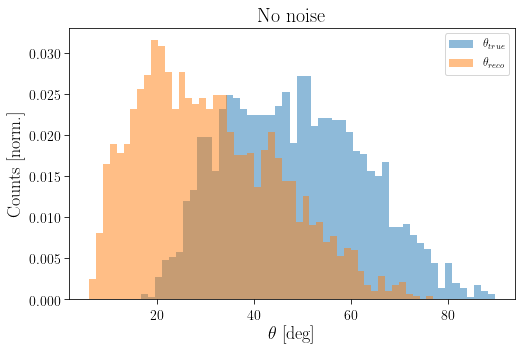

In [86]:
plt.figure(figsize=(8,5))
plt.title("No noise")
plt.ylabel('Counts [norm.]')
plt.hist(recoNu_out.theta_pol, bins=50, density=True, alpha=0.5,  label="$\\theta_{true}$");
plt.hist(recoNu_out.AngRatio, bins=50, density=True, alpha=0.5, label="$\\theta_{reco}$");
plt.xlabel("$\\theta$ [deg]")
plt.legend()

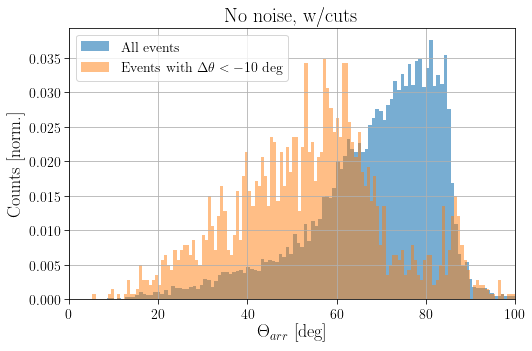

In [87]:
plt.figure(figsize=(8,5))
plt.hist(np.degrees(recoNu.theta_reco), bins=200, density=True, alpha=0.6, label="All events");
plt.hist(np.degrees(recoNu_out.theta_reco),density=True, bins=200, alpha=0.5, 
         label="Events with $\Delta\\theta<-10$ deg");
plt.xlabel("$\Theta_{arr}$ [deg]")
plt.ylabel("Counts [norm.]")
plt.title("No noise, w/cuts")
plt.xlim(0,100)
plt.grid()
plt.legend(fontsize=14)
# plt.savefig(my_path_plots+'/Dumpster/ThetaArr_dist_noise.pdf')

In [93]:
leftTail = recoNu.loc[recoNu.deltaTheta<=0]
rightTail = recoNu.loc[recoNu.deltaTheta>0]
# center = recoNu.loc[((-90+recoNu.AngRatio-(-90+recoNu.theta_pol))==0)]

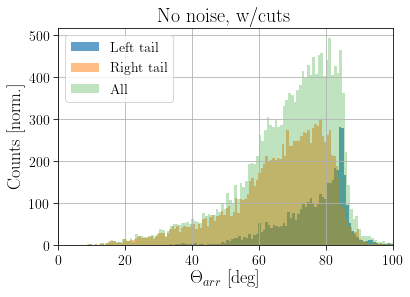

In [94]:
plt.hist(np.degrees(leftTail.theta_reco), bins=200, density=False, alpha=0.7, label="Left tail");
plt.hist(np.degrees(rightTail.theta_reco),density=False, bins=200, alpha=0.5, 
         label="Right tail");
plt.hist(np.degrees(recoNu.theta_reco),density=False, bins=200, alpha=0.3, 
         label="All");
plt.xlabel("$\Theta_{arr}$ [deg]")
plt.ylabel("Counts [norm.]")
plt.title("No noise, w/cuts")
plt.xlim(0,100)
plt.grid()
plt.legend(fontsize=14)

In [4]:
np.linalg.norm(np.array([-0.35322999,0.14812454,-0.92373573]))

1.0000000020321222

## Events debugging

In [25]:
recoNu = pd.read_pickle("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes/debug_JorgeFix.pkl") 
recoNu["theta_pol"] = np.degrees(np.arccos(abs(recoNu.pol_z)))
recoNu["theta_pol"] = recoNu["theta_pol"]
recoNu["deltaTheta"] = -90-recoNu.AngRatio+(90+recoNu.theta_pol)
recoNu = recoNu.loc[recoNu.rms>100]
recoNu = recoNu.loc[recoNu.rms<1400]

recoNu_A = pd.read_pickle("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes/debug_AmyFix.pkl") 
recoNu_A["theta_pol"] = np.degrees(np.arccos(abs(recoNu_A.pol_z)))
recoNu_A["theta_pol"] = recoNu_A["theta_pol"]
recoNu_A["deltaTheta"] = -90-recoNu_A.AngRatio+(90+recoNu_A.theta_pol)
recoNu_A = recoNu_A.loc[recoNu_A.rms>100]
recoNu_A = recoNu_A.loc[recoNu_A.rms<1400]

recoNu_N = pd.read_pickle("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes/debug_unfixed.pkl") 
recoNu_N["theta_pol"] = np.degrees(np.arccos(abs(recoNu_N.pol_z)))
recoNu_N["theta_pol"] = recoNu_N["theta_pol"]
recoNu_N["deltaTheta"] = -90-recoNu_N.AngRatio+(90+recoNu_N.theta_pol)
recoNu_N = recoNu_A.loc[recoNu_N.rms>100]
recoNu_N = recoNu_A.loc[recoNu_N.rms<1400]



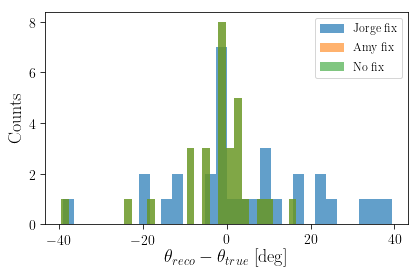

In [30]:
plt.hist(recoNu.deltaTheta, bins=30, density=False, alpha=0.7,label = "Jorge fix")
plt.hist(recoNu_A.deltaTheta, bins=30, density=False, alpha=0.6,label = "Amy fix")
plt.hist(recoNu_N.deltaTheta, bins=30, density=False, alpha=0.6,label = "No fix")


plt.xlabel("$\\theta_{reco}-\\theta_{true}$ [deg]")
# plt.xlabel("$\\theta$")
plt.ylabel('Counts')
# plt.title("Polarization reconstruction vs. MC truth \n $10^{18}-10^{21}$ eV events (no cuts)")
# plt.title("Polarization reconstruction vs. MC truth \n $10^{18}-10^{21}$ eV events ($V_{peak}$+saturation cut)")
plt.legend()
plt.tight_layout()
plt.savefig(my_path_plots+'/Dumpster/recoVsTrue_comparison.png', dpi=150)


In [27]:
recoNu_A-recoNu_N

,pol_z,AngStokes,AngRatio,rms,theta_pol,deltaTheta
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0
